<a href="https://colab.research.google.com/github/nsharma73/capstone_haystack/blob/main/Capstone_Project_PCA_Analysis_Numerical_Features.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Capstone Project - GA Real Estate - PCA Analysis and Clustering - Numerical Features**

*By Liliya Lopez*

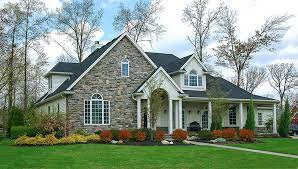

## **1.Introduction**

#####**Libraries used**

In [ ]:
!pip install geopandas

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 1.0 MB 8.4 MB/s 
     |████████████████████████████████| 6.3 MB 40.9 MB/s 
     |████████████████████████████████| 16.7 MB 10.7 MB/s 


In [ ]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt 
import seaborn as sns 
from sklearn import preprocessing
from statsmodels.multivariate.pca import PCA
import geopandas as gpd
from shapely.geometry import Polygon
from shapely.geometry import Point


##### **Import datasets**

In [ ]:
from google.colab import drive

In [ ]:
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
completed_data = pd.read_csv('drive/MyDrive/Colab Notebooks/zillow_schools_tax_dataV2.csv', index_col=0)
pd.set_option('display.max_columns', 20)
completed_data.reset_index(inplace=True)
completed_data.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,address,city,state,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,101 College Street,Kingsland,Georgia,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,169 School House Creek Drive,Saint Marys,Georgia,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1621 Sandpiper Court,Saint Marys,Georgia,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,346 Laurel Landing Boulevard,Kingsland,Georgia,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,81 Ossabaw Way,Waverly,Georgia,...,7.125,1,0,0,0,1,1,0,1,0


In [ ]:
sum(completed_data.duplicated())

0

In [ ]:
completed_data.isnull().sum(axis=0)

rentZestimate                0
zestimate                    0
price_y                      0
PCT_CHG                      0
bathrooms                    0
bedrooms                     0
yearBuilt                    0
address                      0
city                         0
state                        0
zip                          0
latitude                     0
longitude                    0
livingArea                   0
Lot_Size_SqFt                0
Price_SqFt                   0
cap_rate                     0
Tot_Appl                     0
Tot_Comm_Feat                0
Page_Views                   0
Sch_Rat_Avg                  0
Sch_Dist_Avg                 0
sch_cnt                      0
Individuals_taxed            0
Income_per_return            0
Cap_gain                     0
Pension                      0
UE_claims                    0
Social_security              0
SB_income                    0
Student_loan_ded             0
RE_taxes                     0
PP_taxes

In [ ]:
completed_data.shape

(4591, 47)

In [ ]:
completed_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4591 entries, 0 to 4590
Data columns (total 47 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   rentZestimate              4591 non-null   float64
 1   zestimate                  4591 non-null   float64
 2   price_y                    4591 non-null   int64  
 3   PCT_CHG                    4591 non-null   float64
 4   bathrooms                  4591 non-null   int64  
 5   bedrooms                   4591 non-null   int64  
 6   yearBuilt                  4591 non-null   float64
 7   address                    4591 non-null   object 
 8   city                       4591 non-null   object 
 9   state                      4591 non-null   object 
 10  zip                        4591 non-null   int64  
 11  latitude                   4591 non-null   float64
 12  longitude                  4591 non-null   float64
 13  livingArea                 4591 non-null   float

In [ ]:
georgia_map = gpd.read_file('drive/MyDrive/Colab Notebooks/Georgia_State_Boundary/Georgia_State_Boundary.shp')

## **2.PCA Analysis**

#####**Selecting numeric features**

In [ ]:
num_features = completed_data.select_dtypes(include=['int64','float64'])
num_features.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,zip,latitude,longitude,...,other_crime_total_rate,Prop_Cond_Grp_New,Prop_Cond_Grp_Remodeled,Prop_Cond_Grp_Resale,Two_Car_Garage_0,Two_Car_Garage_1,HasPool_0,HasPool_1,HasHardwood_0,HasHardwood_1
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,31548,30.804209,-81.653325,...,6.365,0,0,1,0,1,1,0,1,0
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,31558,30.767365,-81.588272,...,6.815,0,0,1,1,0,1,0,1,0
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,31558,30.746731,-81.633995,...,6.815,0,0,1,0,1,1,0,1,0
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,31548,30.791878,-81.676750,...,6.365,0,0,1,1,0,1,0,1,0
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,31565,31.104492,-81.604486,...,7.125,1,0,0,0,1,1,0,1,0


In [ ]:
num_features = num_features.drop(['Prop_Cond_Grp_New', 'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale', 'Two_Car_Garage_0', 'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1',
                                  'HasHardwood_0', 'HasHardwood_1', 'zip', 'latitude', 'longitude'], axis = 1)

In [ ]:
num_features.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt',
       'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate'],
      dtype='object')

##### **Covariance matrix**

In [ ]:
pca = PCA(num_features, standardize=True, method='eig')
normalized_dataset = pca.transformed_data

In [ ]:
covariance_df = pd.DataFrame(data=np.cov(normalized_dataset, bias=True, rowvar=False), columns=num_features.columns)

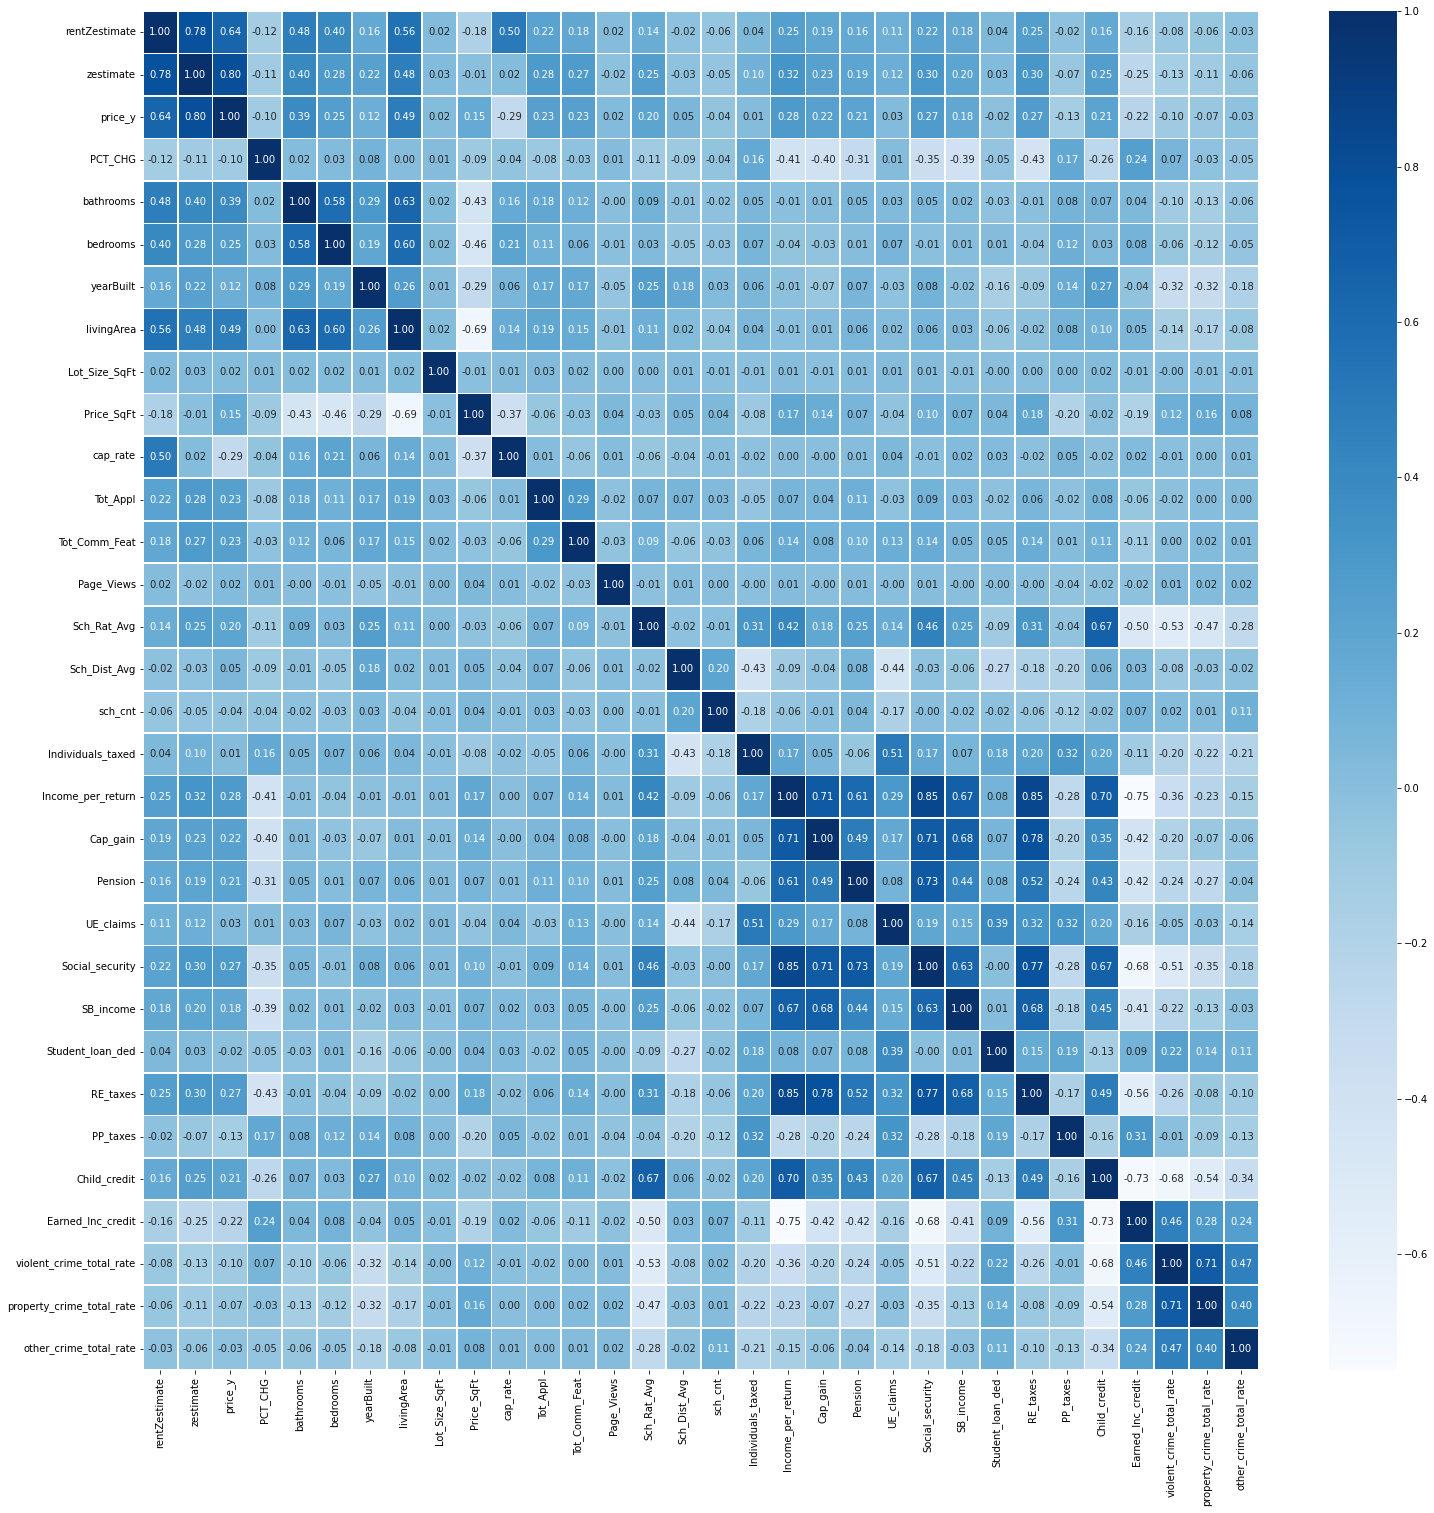

In [ ]:
# Plot Covariance Matrix
plt.subplots(figsize=(25, 25))
sns.heatmap(covariance_df, cmap='Blues', linewidths=.7, annot=True, fmt='.2f', yticklabels=num_features.columns)
plt.show()


##### **Run PCA**

In [ ]:
# Run PCA with eig method (eigenvectors of the covariance matrix become the components)
pca = PCA(num_features, standardize=True, method='eig')
components_df = pca.factors

In [ ]:
components_df

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_22,comp_23,comp_24,comp_25,comp_26,comp_27,comp_28,comp_29,comp_30,comp_31
0,0.005003,-0.002050,-0.015674,-0.001481,0.003169,0.020978,0.017378,-0.005550,0.000279,-0.007597,...,0.014293,0.022105,-0.016369,-0.000514,-0.008353,-0.009085,0.012470,0.001716,0.000284,0.010119
1,-0.002710,-0.004656,-0.008376,-0.002715,0.031772,0.007985,0.019813,-0.007861,0.002146,-0.004548,...,0.000813,0.030338,0.004057,0.004162,-0.008232,0.002335,-0.015214,0.019500,0.023521,0.038097
2,-0.002312,0.007033,-0.007201,0.003372,0.001090,0.043226,0.022121,-0.007847,0.003787,-0.022828,...,0.006971,0.027387,0.001023,0.001977,0.001638,-0.000392,-0.013569,0.018961,0.020672,0.004729
3,0.006442,0.004217,-0.020610,0.001039,0.006622,0.015529,0.015974,-0.005540,-0.001178,-0.002291,...,0.021216,0.021597,-0.017998,-0.001159,-0.006751,-0.014848,0.012418,-0.000115,0.000477,0.014534
4,-0.003701,0.016229,0.007351,0.055448,0.007247,0.031130,0.002994,-0.006250,0.001937,-0.007904,...,-0.021591,-0.046266,-0.019585,-0.007361,0.023675,-0.059841,-0.007279,0.027570,0.017625,-0.012991
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4586,0.005655,0.018374,0.012925,0.039598,0.001991,-0.001295,-0.012976,0.010656,-0.005674,0.015378,...,-0.010048,0.025561,-0.057952,0.010078,0.031955,-0.043213,0.041840,0.025259,0.020220,-0.018769
4587,0.011416,0.003286,0.022247,-0.004985,0.030867,-0.017722,-0.029534,0.008108,0.007936,0.000844,...,0.027778,0.041740,0.017560,-0.010813,0.020329,0.019454,0.001236,-0.023645,0.021380,-0.002146
4588,0.006882,-0.007999,0.032403,-0.005305,0.031792,-0.038365,-0.005868,0.017556,-0.008713,0.007498,...,0.025967,0.046295,0.023266,-0.003232,-0.016624,0.017307,0.001853,0.012309,-0.009622,-0.018178
4589,0.003695,-0.005010,0.025394,0.022338,0.058129,-0.030879,0.025514,0.002796,-0.008566,0.021753,...,-0.003745,0.027415,-0.047325,0.020173,-0.020375,-0.036537,0.040447,0.005049,0.045403,0.036069


In [ ]:
combined_df = pd.concat([num_features, components_df], axis=1)
correlation = combined_df.corr()

In [ ]:
correlation_data = correlation[:-len(components_df.columns)].loc[:, 'comp_00':]

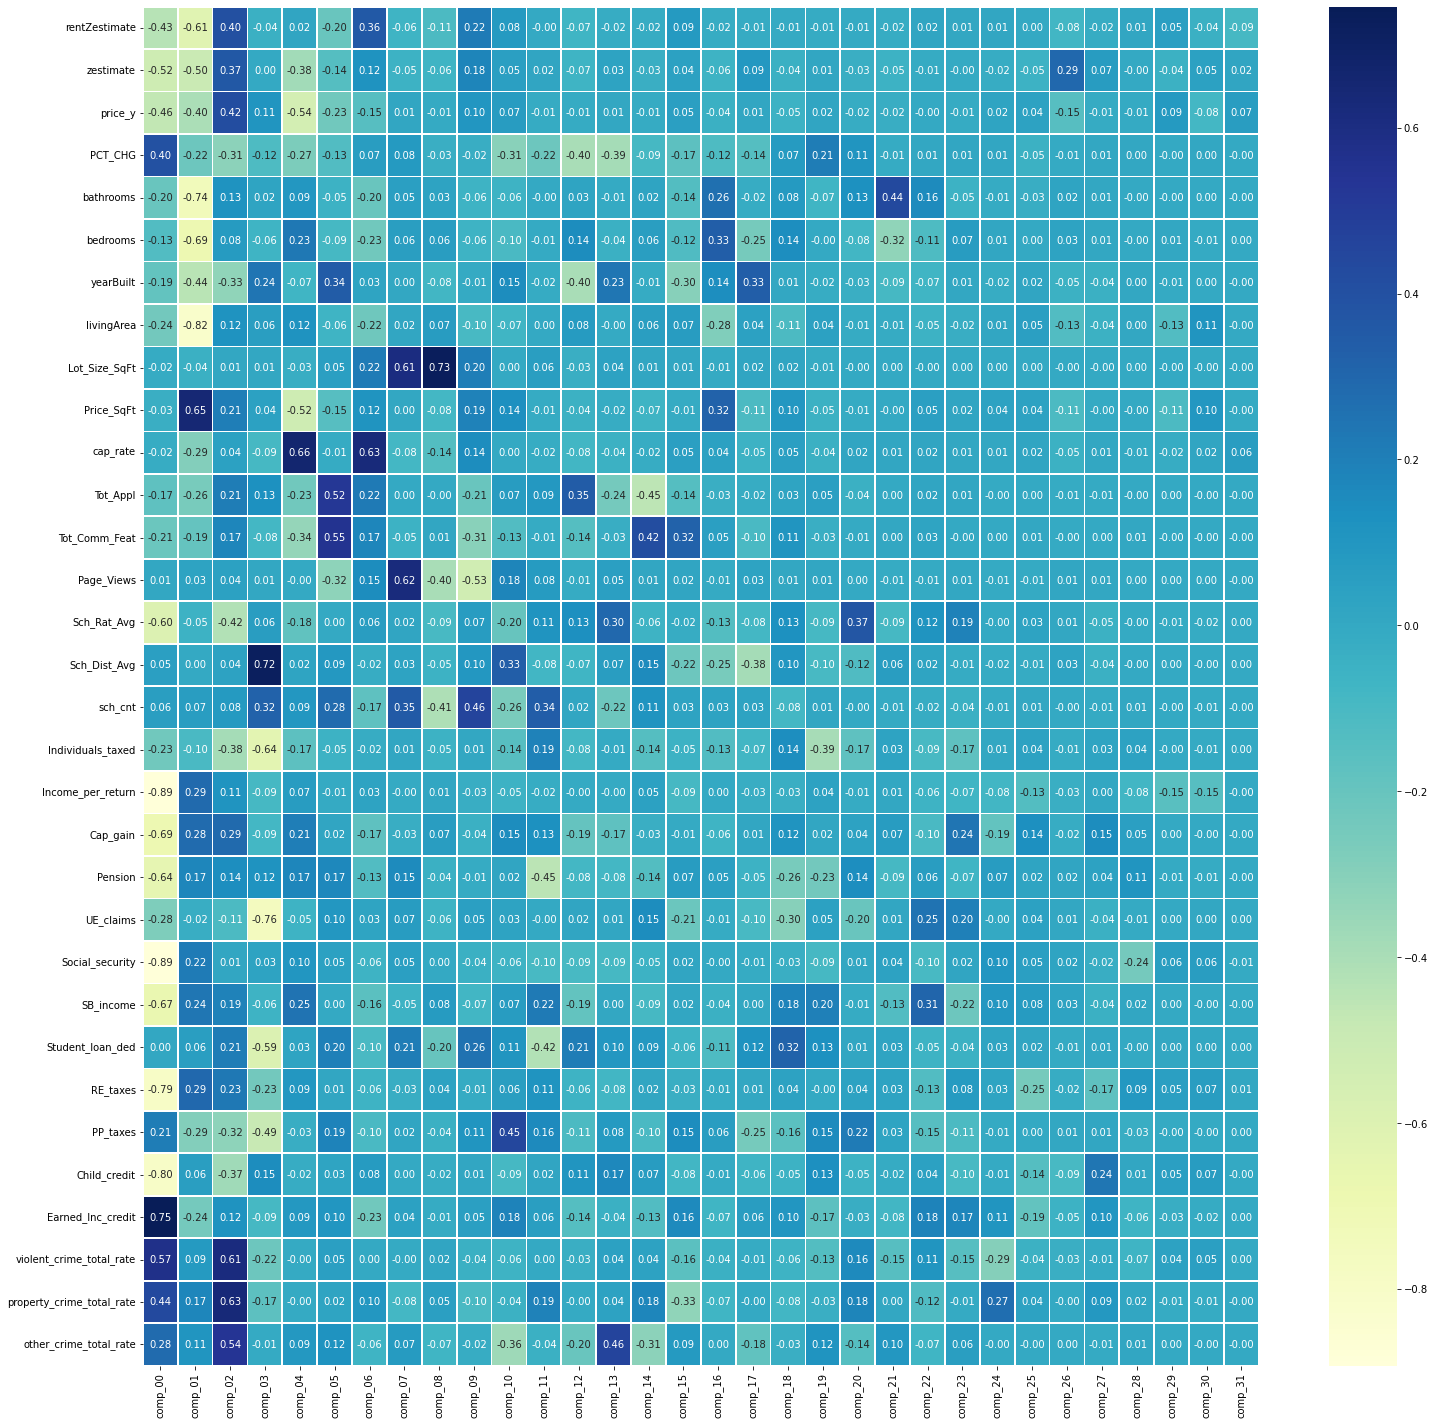

In [ ]:
# plot correlation matrix
fig, ax = plt.subplots(figsize=(25, 25))
sns.heatmap(correlation_data, cmap='YlGnBu', linewidths=.7, annot=True, fmt='.2f')
plt.show()

In [ ]:
pca = PCA(num_features, standardize=True, method='eig')
loadings = pca.loadings


In [ ]:
loadings

,comp_00,comp_01,comp_02,comp_03,comp_04,comp_05,comp_06,comp_07,comp_08,comp_09,...,comp_22,comp_23,comp_24,comp_25,comp_26,comp_27,comp_28,comp_29,comp_30,comp_31
rentZestimate,-0.163912,-0.310020,0.242621,-0.025478,0.016194,-0.187151,0.343813,-0.064386,-0.111129,0.221720,...,0.030093,0.012461,0.024359,0.000882,-0.186913,-0.044818,0.033822,0.178896,-0.150299,-0.688819
zestimate,-0.197335,-0.253147,0.222001,0.000324,-0.289258,-0.128706,0.116324,-0.048035,-0.061900,0.181336,...,-0.019928,-0.006717,-0.043900,-0.116402,0.720186,0.180809,-0.001002,-0.162648,0.177507,0.137748
price_y,-0.176037,-0.203797,0.250790,0.068449,-0.414009,-0.211914,-0.141378,0.012532,-0.007270,0.104902,...,-0.002769,-0.025120,0.047624,0.093737,-0.366272,-0.029904,-0.028623,0.312218,-0.301339,0.504437
PCT_CHG,0.151045,-0.109890,-0.189358,-0.072968,-0.203305,-0.114730,0.064888,0.080474,-0.029012,-0.024291,...,0.016057,0.020247,0.021790,-0.106641,-0.022682,0.025189,0.011328,-0.008944,0.015209,-0.004923
bathrooms,-0.077067,-0.372046,0.075465,0.015122,0.072049,-0.048278,-0.194879,0.051516,0.029113,-0.060871,...,0.257274,-0.086835,-0.025133,-0.064476,0.056538,0.022329,-0.004493,-0.005916,0.006920,-0.000537
bedrooms,-0.048134,-0.348205,0.046194,-0.038563,0.177207,-0.082828,-0.222028,0.055772,0.063557,-0.059771,...,-0.185215,0.120230,0.025344,0.007640,0.073806,0.020697,-0.004140,0.018828,-0.020516,0.002680
yearBuilt,-0.071322,-0.222519,-0.197507,0.152379,-0.055556,0.314414,0.025837,0.003794,-0.079286,-0.008468,...,-0.116067,0.014285,-0.036703,0.046545,-0.113712,-0.095592,0.013239,-0.033160,0.009022,-0.009228
livingArea,-0.090014,-0.414501,0.072010,0.034797,0.093330,-0.057832,-0.217014,0.015095,0.070184,-0.097586,...,-0.080741,-0.041745,0.021076,0.122129,-0.316129,-0.115629,0.011980,-0.473735,0.414891,-0.016107
Lot_Size_SqFt,-0.005949,-0.017751,0.004292,0.005965,-0.021310,0.046717,0.209951,0.604089,0.731586,0.206317,...,-0.002048,0.000444,0.001562,0.007911,-0.001250,-0.003540,0.005830,-0.003514,-0.004230,-0.000476
Price_SqFt,-0.011067,0.325741,0.124454,0.028092,-0.396452,-0.133808,0.111872,0.003653,-0.081392,0.196358,...,0.086428,0.034400,0.073353,0.091256,-0.262709,-0.012262,-0.002280,-0.392531,0.362222,-0.033332


##### **Dimensionality reduction**

The traditional methods for picking factors include: 
- kaiser criterion
- explained variance
- scree plot 

**Kaiser criterion**

*With this approach we choose the principal components (factors) that have eigenvalues greater than 1.* 

In [ ]:
pca = PCA(num_features, standardize=True, method='eig')
eigen_values = pd.DataFrame(data=pca.eigenvals.values, columns=['eigenvalue'])

In [ ]:
eigen_values

,eigenvalue
0,31900.355872
1,18049.775833
2,12598.186169
3,11544.120436
4,7893.121937
5,5494.838303
6,4923.441899
7,4613.014437
8,4571.876456
9,4415.593945


**Explained variance**

*With this method, we choose the total amount of variance in the dataset you want principal amount components to encode (80 or 90%)*

In [ ]:
pca = PCA(num_features, standardize=True, method='eig')

# Cumulative Variance Explained
cumulative_variance_explained = pd.DataFrame(data=pca.rsquare.values, columns=['cumulative_var'])

In [ ]:
cumulative_variance_explained

,cumulative_var
0,0.000000
1,0.217139
2,0.340000
3,0.425754
4,0.504332
5,0.558059
6,0.595461
7,0.628974
8,0.660374
9,0.691494


- the first 15 components explain about 80% of variance 

- the first 20 component explain about 90% of variance in the dataset

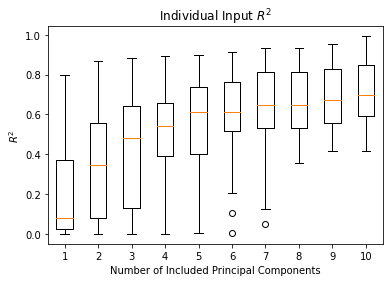

In [ ]:
pca = PCA(num_features, standardize=True, method='eig')
pca.plot_rsquare()
plt.show()

**Scree plot**

*With this method we use the elbow method to determine the cut-off point*

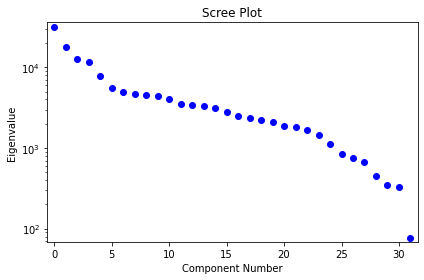

In [ ]:
pca = PCA(num_features, standardize=True, method='eig')
pca.plot_scree()
plt.show()
#number of components #5

## **3.Combining PCA and K-means Clustering**

In [ ]:
completed_data.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'address', 'city', 'state', 'zip', 'latitude',
       'longitude', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt', 'cap_rate',
       'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate',
       'Prop_Cond_Grp_New', 'Prop_Cond_Grp_Remodeled', 'Prop_Cond_Grp_Resale',
       'Two_Car_Garage_0', 'Two_Car_Garage_1', 'HasPool_0', 'HasPool_1',
       'HasHardwood_0', 'HasHardwood_1'],
      dtype='object')

Text(0.5, 1.0, 'Visualization of Latitude vs Longitude')

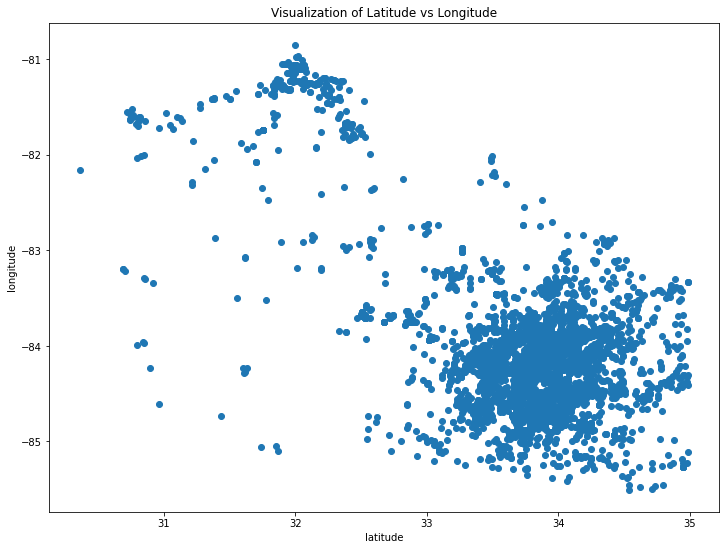

In [ ]:
plt.figure(figsize = (12, 9))
plt.scatter(completed_data.latitude, completed_data.longitude)
plt.xlabel('latitude')
plt.ylabel('longitude')
plt.title("Visualization of Latitude vs Longitude")

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [ ]:
scaler = StandardScaler()
segmentation_std = scaler.fit_transform(num_features)

In [ ]:
pca = PCA()
pca.fit(segmentation_std)

PCA()

In [ ]:
first_ten_ratios = pca.explained_variance_ratio_[0:10]
first_ten_ratios

array([0.21713921, 0.12286114, 0.08575328, 0.07857847, 0.05372687,
       0.03740224, 0.03351286, 0.03139985, 0.03111983, 0.03005605])

Text(0, 0.5, 'Cumulative Explained Variance')

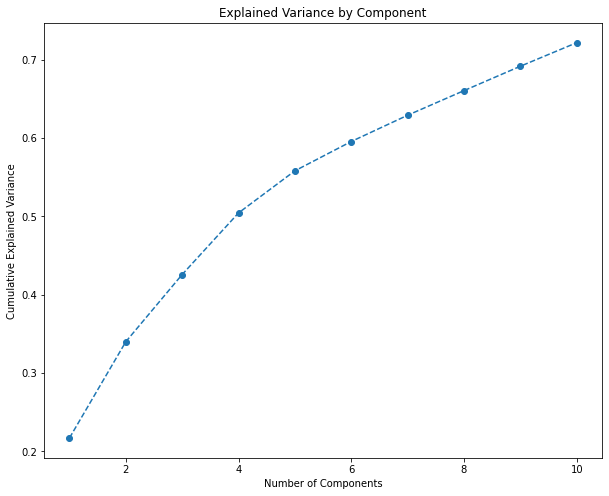

In [ ]:
plt.figure(figsize = (10,8))
plt.plot(range(1, 11), first_ten_ratios.cumsum(), marker = 'o', linestyle = '--')
plt.title('Explained Variance by Component')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')


In [ ]:
pca = PCA(n_components=4)

In [ ]:
pca.fit(segmentation_std)

PCA(n_components=4)

In [ ]:
pca.transform(segmentation_std)

array([[-0.89353845,  0.27578719, -1.75955574, -0.16159875],
       [ 0.48395548,  0.62539731, -0.94057219, -0.29190556],
       [ 0.41290994, -0.94484525, -0.80887902,  0.36110297],
       ...,
       [-1.22915699,  1.07376712,  3.63553806, -0.56523377],
       [-0.65988212,  0.6719345 ,  2.8498236 ,  2.40782852],
       [-3.10576477, -0.47680679, -0.72457129,  5.79543916]])

In [ ]:
scores_pca = pca.transform(segmentation_std)

In [ ]:
from sklearn.cluster import KMeans

In [ ]:
sum_of_squares = [] #find summ of squares within cluster
for i in range(1, 21):
  kmeans_pca = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
  kmeans_pca.fit(scores_pca)
  sum_of_squares.append(kmeans_pca.inertia_)

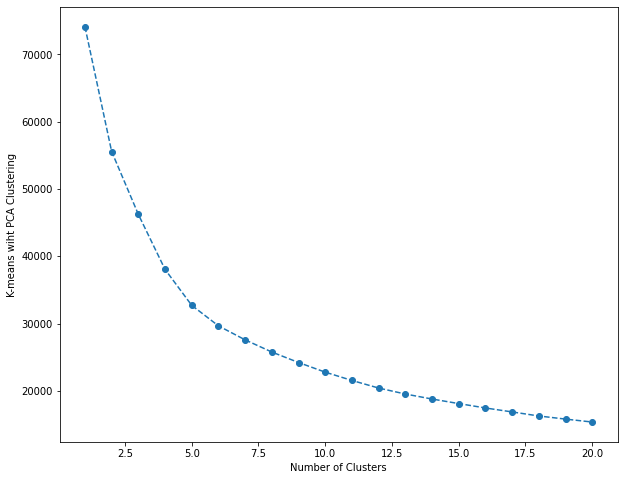

In [ ]:
plt.figure(figsize = (10, 8))
plt.plot(range(1, 21), sum_of_squares, marker = 'o', linestyle = '--')
plt.xlabel('Number of Clusters')
plt.ylabel('K-means wiht PCA Clustering')
plt.show()

In [ ]:
kmeans_pca = KMeans(n_clusters = 5, init = 'k-means++', random_state=42)

In [ ]:
 kmeans_pca.fit(scores_pca)

KMeans(n_clusters=5, random_state=42)

In [ ]:
kmeans_pca.labels_

array([1, 1, 1, ..., 0, 3, 3], dtype=int32)

In [ ]:
df_segm_pca_kmeans = pd.concat([num_features.reset_index(drop = True), pd.DataFrame(scores_pca)], axis = 1)
df_segm_pca_kmeans.columns.values[-4:] = ['comp1', 'comp2', 'comp3', 'comp4']
df_segm_pca_kmeans['Segment K-means PCA'] = kmeans_pca.labels_

In [ ]:
df_segm_pca_kmeans.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,livingArea,Lot_Size_SqFt,Price_SqFt,...,Child_credit,Earned_Inc_credit,violent_crime_total_rate,property_crime_total_rate,other_crime_total_rate,comp1,comp2,comp3,comp4,Segment K-means PCA
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,2103.0,19602.000000,161.626248,...,2.125743,2.585463,3.523,14.37,6.365,-0.893538,0.275787,-1.759556,-0.161599,1
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,2269.0,7840.000000,136.624064,...,2.175097,2.555497,3.685,32.40,6.815,0.483955,0.625397,-0.940572,-0.291906,1
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1846.0,8276.000000,170.639220,...,2.175097,2.555497,3.685,32.40,6.815,0.412910,-0.944845,-0.808879,0.361103,1
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,1977.0,4025.039983,156.803237,...,2.125743,2.585463,3.523,14.37,6.365,-1.150654,-0.565971,-2.312846,0.109762,1
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,1835.0,52707.600000,201.580381,...,1.936000,2.294118,5.438,13.98,7.125,0.661023,-2.178933,0.827376,5.953894,3


In [ ]:
df_segm_pca_kmeans['Segment'] = df_segm_pca_kmeans['Segment K-means PCA'].map({0: 'first', 1: 'second', 2: 'third', 3: 'fourth', 4: 'fifth'})

In [ ]:
df_segm_pca_kmeans.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt',
       'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate', 'comp1', 'comp2',
       'comp3', 'comp4', 'Segment K-means PCA', 'Segment'],
      dtype='object')

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


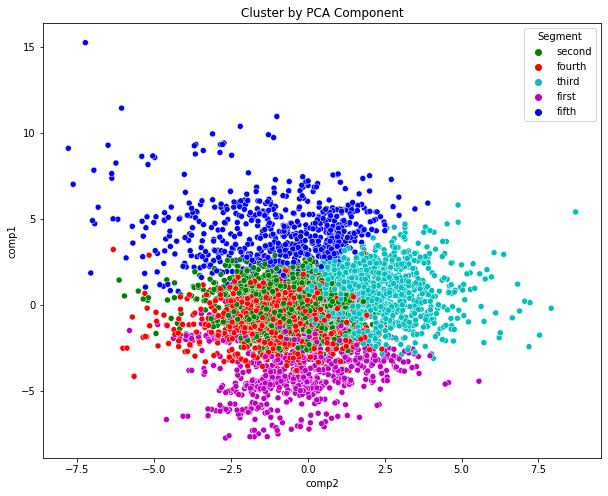

In [ ]:
x_axis = df_segm_pca_kmeans['comp2']
y_axis = df_segm_pca_kmeans['comp1']
plt.figure(figsize = (10, 8))
sns.scatterplot(x_axis, y_axis, hue = df_segm_pca_kmeans['Segment'], palette = ['g', 'r', 'c', 'm', 'b'])
plt.title('Cluster by PCA Component')
plt.show()

In [ ]:
df_segm_pca_kmeans['latitude'] = completed_data['latitude']
df_segm_pca_kmeans['longitude'] = completed_data['longitude']

[Text(0.5, 1.0, 'Segmentation K-means')]

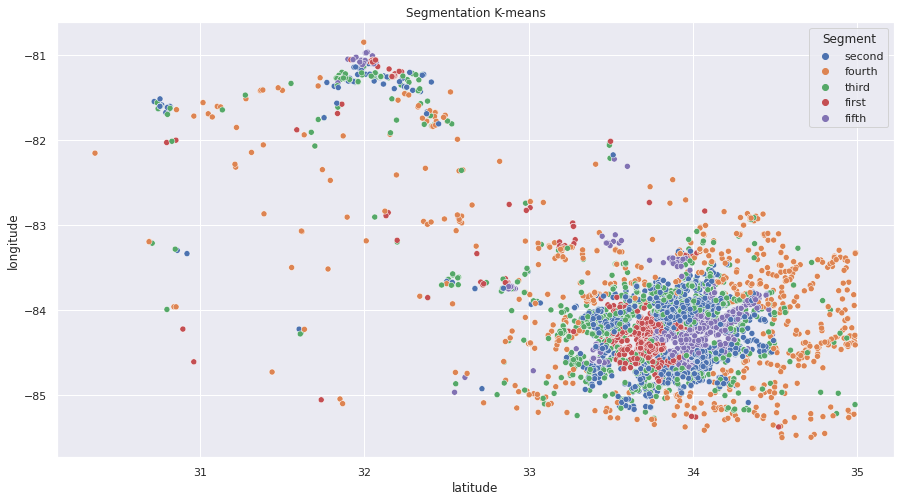

In [ ]:
sns.set(rc = {'figure.figsize':(15,8)})
sns.scatterplot(data = df_segm_pca_kmeans, x = 'latitude',  y = 'longitude', hue = 'Segment').set(title = "Segmentation K-means")

## **4. Plot clusters on the map**

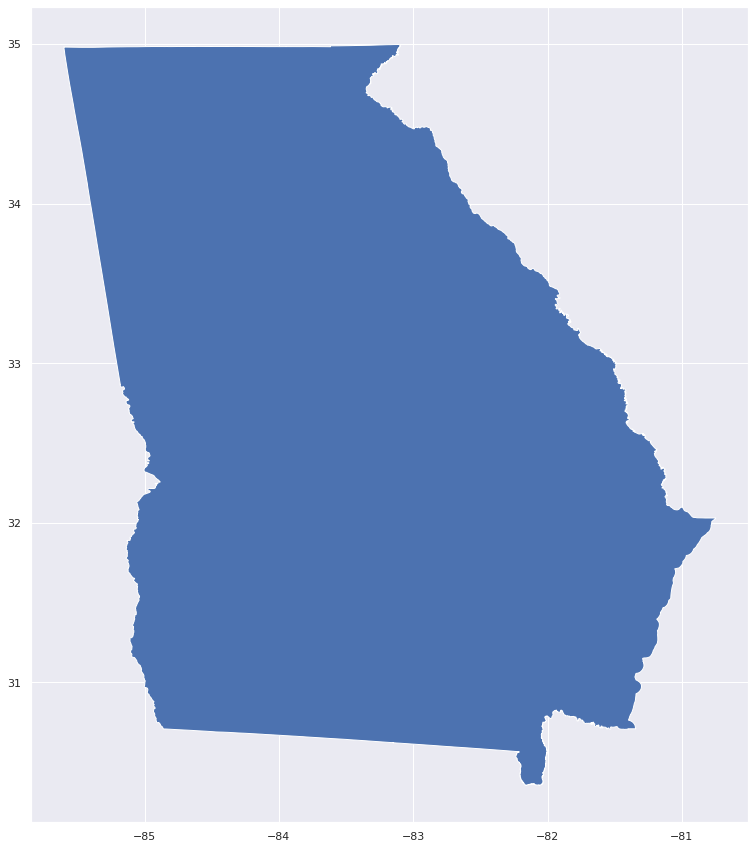

In [ ]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax = ax)

In [ ]:
df_map = df_segm_pca_kmeans
crs = {'init':'epsg:4326'}
df_map.head()

,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,livingArea,Lot_Size_SqFt,Price_SqFt,...,property_crime_total_rate,other_crime_total_rate,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment,latitude,longitude
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,2103.0,19602.000000,161.626248,...,14.37,6.365,-0.893538,0.275787,-1.759556,-0.161599,1,second,30.804209,-81.653325
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,2269.0,7840.000000,136.624064,...,32.40,6.815,0.483955,0.625397,-0.940572,-0.291906,1,second,30.767365,-81.588272
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1846.0,8276.000000,170.639220,...,32.40,6.815,0.412910,-0.944845,-0.808879,0.361103,1,second,30.746731,-81.633995
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,1977.0,4025.039983,156.803237,...,14.37,6.365,-1.150654,-0.565971,-2.312846,0.109762,1,second,30.791878,-81.676750
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,1835.0,52707.600000,201.580381,...,13.98,7.125,0.661023,-2.178933,0.827376,5.953894,3,fourth,31.104492,-81.604486


In [ ]:
geometry = [Point(xy) for xy in zip (df_map['longitude'], df_map['latitude'])]
geometry[:3]

In [ ]:
geo_df = gpd.GeoDataFrame(df_map, crs = crs, geometry = geometry)
geo_df.head()

/usr/local/lib/python3.7/dist-packages/pyproj/crs/crs.py:131: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


,rentZestimate,zestimate,price_y,PCT_CHG,bathrooms,bedrooms,yearBuilt,livingArea,Lot_Size_SqFt,Price_SqFt,...,other_crime_total_rate,comp1,comp2,comp3,comp4,Segment K-means PCA,Segment,latitude,longitude,geometry
0,2177.90,347870.00,339900,0.117940,2,4,2020.0,2103.0,19602.000000,161.626248,...,6.365,-0.893538,0.275787,-1.759556,-0.161599,1,second,30.804209,-81.653325,POINT (-81.65332 30.80421)
1,2600.00,325200.00,310000,0.113899,3,5,2004.0,2269.0,7840.000000,136.624064,...,6.815,0.483955,0.625397,-0.940572,-0.291906,1,second,30.767365,-81.588272,POINT (-81.58827 30.76737)
2,1999.00,340500.00,315000,0.113899,2,3,2004.0,1846.0,8276.000000,170.639220,...,6.815,0.412910,-0.944845,-0.808879,0.361103,1,second,30.746731,-81.633995,POINT (-81.63399 30.74673)
3,1999.00,312758.00,310000,0.117940,2,3,2018.0,1977.0,4025.039983,156.803237,...,6.365,-1.150654,-0.565971,-2.312846,0.109762,1,second,30.791878,-81.676750,POINT (-81.67675 30.79188)
4,1980.45,362160.13,369900,0.020674,2,3,2022.0,1835.0,52707.600000,201.580381,...,7.125,0.661023,-2.178933,0.827376,5.953894,3,fourth,31.104492,-81.604486,POINT (-81.60449 31.10449)


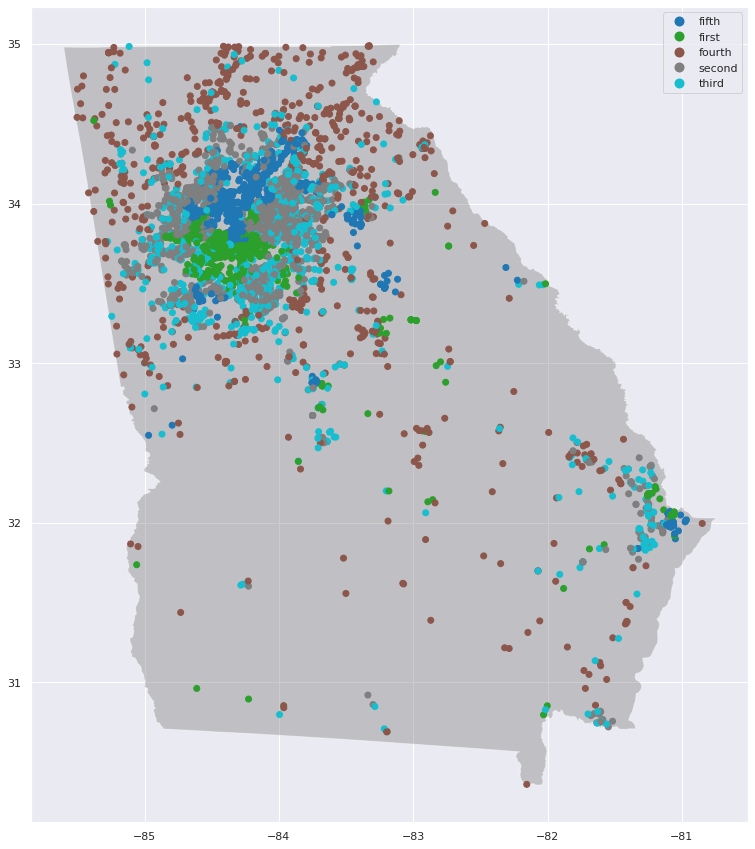

In [ ]:
fig,ax = plt.subplots(figsize =(15,15))
georgia_map.plot(ax=ax, alpha = 0.4, color = 'grey')
geo_df.plot(column = 'Segment', ax=ax, legend = True, label = "Segmentation")


In [ ]:
geo_df.Segment.value_counts()

second    1389
third     1127
first      718
fourth     717
fifth      640
Name: Segment, dtype: int64

## **5. Clusters Analysis**

In [ ]:
df_segm_pca_kmeans.columns

Index(['rentZestimate', 'zestimate', 'price_y', 'PCT_CHG', 'bathrooms',
       'bedrooms', 'yearBuilt', 'livingArea', 'Lot_Size_SqFt', 'Price_SqFt',
       'cap_rate', 'Tot_Appl', 'Tot_Comm_Feat', 'Page_Views', 'Sch_Rat_Avg',
       'Sch_Dist_Avg', 'sch_cnt', 'Individuals_taxed', 'Income_per_return',
       'Cap_gain', 'Pension', 'UE_claims', 'Social_security', 'SB_income',
       'Student_loan_ded', 'RE_taxes', 'PP_taxes', 'Child_credit',
       'Earned_Inc_credit', 'violent_crime_total_rate',
       'property_crime_total_rate', 'other_crime_total_rate', 'comp1', 'comp2',
       'comp3', 'comp4', 'Segment K-means PCA', 'Segment', 'latitude',
       'longitude', 'geometry'],
      dtype='object')

In [ ]:
df1 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'first']
df2 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'second']
df3 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'third']
df4 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'fourth']
df5 = df_segm_pca_kmeans[df_segm_pca_kmeans.Segment == 'fifth']

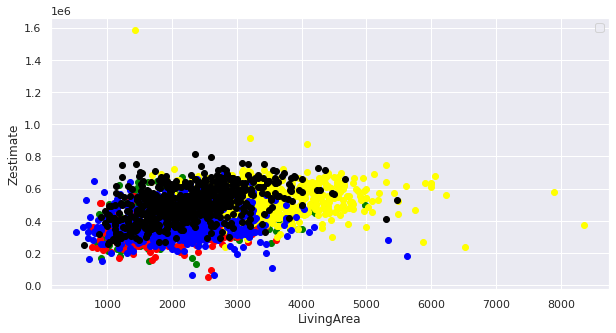

In [ ]:
plt.figure(figsize = (10,5))

plt.scatter(df1['livingArea'], df1['zestimate'], color = 'green')
plt.scatter(df2['livingArea'], df2['zestimate'], color = 'red')
plt.scatter(df3['livingArea'], df3['zestimate'], color = 'yellow')
plt.scatter(df4['livingArea'], df4['zestimate'], color='blue')
plt.scatter(df5['livingArea'], df5['zestimate'], color='black')


plt.xlabel('LivingArea')
plt.ylabel('Zestimate')
plt.legend()

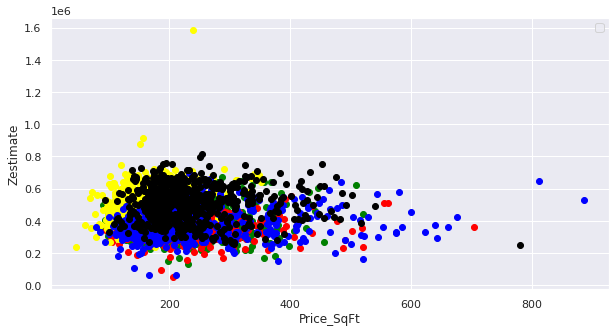

In [ ]:
plt.figure(figsize = (10,5))

plt.scatter(df1['Price_SqFt'], df1['zestimate'], color = 'green')
plt.scatter(df2['Price_SqFt'], df2['zestimate'], color = 'red')
plt.scatter(df3['Price_SqFt'], df3['zestimate'], color = 'yellow')
plt.scatter(df4['Price_SqFt'], df4['zestimate'], color='blue')
plt.scatter(df5['Price_SqFt'], df5['zestimate'], color='black')


plt.xlabel('Price_SqFt')
plt.ylabel('Zestimate')
plt.legend()

In [ ]:
clus_1_median = df1.select_dtypes(include=['int64','float64']).median()

In [ ]:
clus_2_median = df2.select_dtypes(include=['int64','float64']).median()

In [ ]:
clus_3_median = df3.select_dtypes(include=['int64','float64']).median()

In [ ]:
clus_4_median = df4.select_dtypes(include=['int64','float64']).median()

In [ ]:
clus_5_median = df5.select_dtypes(include=['int64','float64']).median()

In [ ]:
join = [clus_1_median, clus_2_median, clus_3_median, clus_4_median, clus_5_median]
cluster_medians = pd.concat(join, axis = 1)
cluster_medians = cluster_medians.rename(columns= {0: 'Cluster 1', 1: 'Cluster 2', 2: 'Cluster 3', 3: 'Cluster 4', 4: 'Cluster 5'})

In [ ]:
round(cluster_medians, 2)

,Cluster 1,Cluster 2,Cluster 3,Cluster 4,Cluster 5
rentZestimate,2173.00,2195.00,2935.00,2126.00,2789.76
zestimate,359050.00,371500.00,501000.00,367916.66,514550.00
price_y,374700.00,377946.00,499000.00,399900.00,505000.00
PCT_CHG,0.15,0.15,0.15,0.13,0.12
bathrooms,3.00,3.00,4.00,3.00,3.00
bedrooms,3.00,3.00,4.00,3.00,4.00
yearBuilt,1968.00,1996.00,2007.00,2000.00,1989.50
livingArea,1825.50,2004.00,3030.00,2020.00,2290.50
Lot_Size_SqFt,13068.00,19602.00,17859.60,47916.00,13939.20
Price_SqFt,209.79,193.82,161.76,200.60,217.43
